# MoodShelf 

In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

df = pd.read_csv("./goodreads-data-50k.csv")
df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,word_count,input_ids,token_type_ids,attention_mask
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,Scholastic Press,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09,147,[ 101 160 11607 27451 11780 22157 14962 17...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,Scholastic Inc.,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38,136,[ 101 1247 1110 170 1442 1120 1103 13...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,NaN,324,Harper Perennial Modern Classics,05/23/06,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN,137,[ 101 1109 8362 14467 12272 5100 2165 22...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,"Modern Library Classics, USA / CAN",279,Modern Library,10/10/00,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN,100,[ 101 14234 2267 2596 1104 2282 4087 15...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,501,"Little, Brown and Company",09/06/06,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1,51,[ 101 3517 1210 1614 146 1108 7284 31...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...


## Explanatory Data Analysis

In [201]:
cols_to_keep = [
    "title",
    "author",
    "rating",
    "description",
    "language",
    "genres",
    "pages",
    "publisher",
    "publishDate",
    "numRatings",
    "likedPercent",
    "coverImg",
]

df_subset = df[cols_to_keep]
df_subset.head()

,title,author,rating,description,language,genres,pages,publisher,publishDate,numRatings,likedPercent,coverImg
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",374,Scholastic Press,09/14/08,6376780,96.0,https://i.gr-assets.com/images/S/compressed.ph...
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",870,Scholastic Inc.,09/28/04,2507623,98.0,https://i.gr-assets.com/images/S/compressed.ph...
2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,"['Classics', 'Fiction', 'Historical Fiction', ...",324,Harper Perennial Modern Classics,05/23/06,4501075,95.0,https://i.gr-assets.com/images/S/compressed.ph...
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,"['Classics', 'Fiction', 'Romance', 'Historical...",279,Modern Library,10/10/00,2998241,94.0,https://i.gr-assets.com/images/S/compressed.ph...
4,Twilight,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",501,"Little, Brown and Company",09/06/06,4964519,78.0,https://i.gr-assets.com/images/S/compressed.ph...


In [202]:
duplicate_groups = df_subset[df_subset.duplicated(subset=cols_to_keep, keep=False)]

num_duplicate_groups = duplicate_groups.duplicated(subset=cols_to_keep).sum()

print(f"Number of duplicate groups: {num_duplicate_groups}")

Number of duplicate groups: 11821


In [203]:
# View the first few duplicate rows
duplicate_groups.sort_values(by=cols_to_keep).head()

,title,author,rating,description,language,genres,pages,publisher,publishDate,numRatings,likedPercent,coverImg
33714,"""Evil"" Arabs in American Popular Film: Orienta...",Tim Jon Semmerling,4.50,"Runner-up, 2006 Arab American National Museum ...",English,[],303,University of Texas Press,September 1st 2006,4,NaN,https://i.gr-assets.com/images/S/compressed.ph...
33715,"""Evil"" Arabs in American Popular Film: Orienta...",Tim Jon Semmerling,4.50,"Runner-up, 2006 Arab American National Museum ...",English,[],303,University of Texas Press,September 1st 2006,4,NaN,https://i.gr-assets.com/images/S/compressed.ph...
22310,"""The Mmmmmhh Thing""",K. Harvey (Goodreads Author),4.67,“The Mmmmmmhh Thing”... Is a provocative conte...,English,[],350,Luminous Events LLC,November 11th 2014,3,100.0,https://i.gr-assets.com/images/S/compressed.ph...
22311,"""The Mmmmmhh Thing""",K. Harvey (Goodreads Author),4.67,“The Mmmmmmhh Thing”... Is a provocative conte...,English,[],350,Luminous Events LLC,November 11th 2014,3,100.0,https://i.gr-assets.com/images/S/compressed.ph...
34580,"""There Are Things I Want You to Know"" about St...","Eva Gabrielsson, Marie-Françoise Colombani, Li...",3.47,Here is the real inside story—not the one abou...,English,"['Nonfiction', 'Biography', 'Memoir', 'Biograp...",209,Seven Stories Press,June 21st 2011,1348,84.0,https://i.gr-assets.com/images/S/compressed.ph...


In [204]:
# Remove duplicates and keep the first occurrence
df_subset_cleaned = df_subset.drop_duplicates(subset=cols_to_keep, keep="first")

print(f"Before: {df_subset.shape}")
print(f"After: {df_subset_cleaned.shape}")

Before: (53944, 12)
After: (42123, 12)


In [205]:
df_subset_cleaned = df_subset_cleaned.dropna(subset=["description"])

In [206]:
def create_histogram(x, xlabel, title):
    plt.figure(figsize=(8, 5))
    plt.hist(df_subset_cleaned[x], bins=20, edgecolor="black")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.grid(axis="y", alpha=0.7)
    plt.tight_layout()
    plt.show()

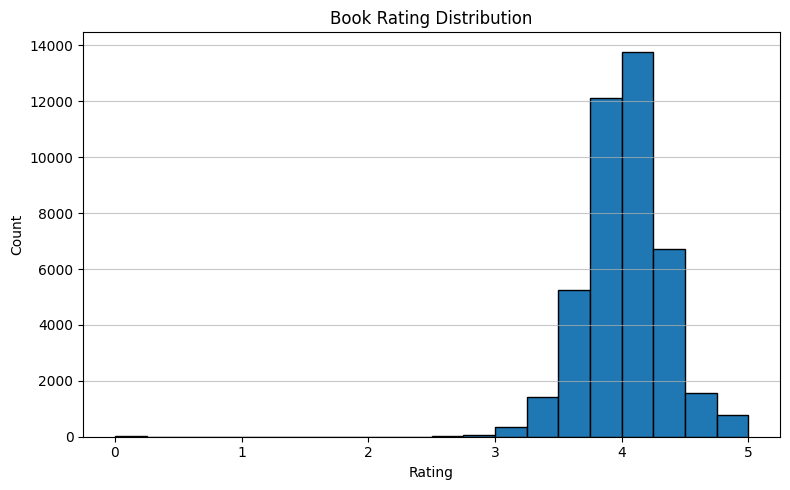

In [207]:
create_histogram(x="rating", xlabel="Rating", title="Book Rating Distribution")

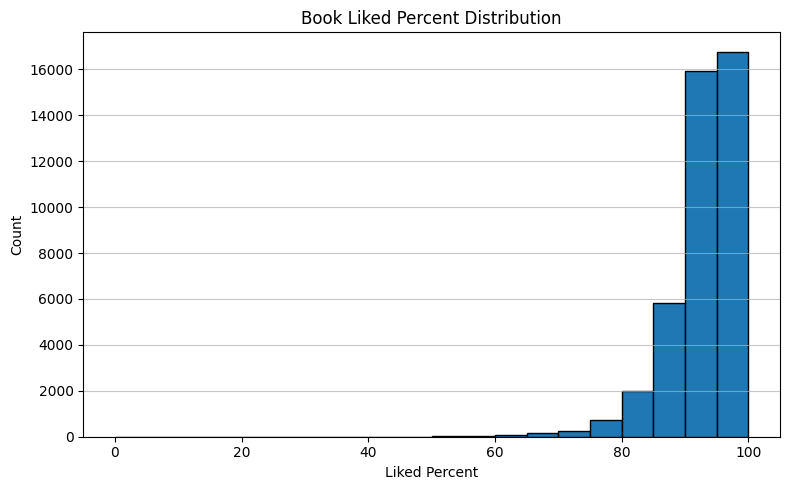

In [208]:
create_histogram(
    x="likedPercent", xlabel="Liked Percent", title="Book Liked Percent Distribution"
)

## Preprocess the Description

In [209]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("punkt_tab")

stop_words = set(stopwords.words("english"))


def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = word_tokenize(text)  # tokenize
    filtered_tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = " ".join(filtered_tokens)
    return cleaned_text

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/christiandarvs/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [210]:
df_subset_cleaned["description_cleaned"] = df_subset_cleaned["description"].apply(
    preprocess_text
)

In [211]:
df_subset_cleaned.head()

,title,author,rating,description,language,genres,pages,publisher,publishDate,numRatings,likedPercent,coverImg,description_cleaned
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",374,Scholastic Press,09/14/08,6376780,96.0,https://i.gr-assets.com/images/S/compressed.ph...,winning means fame fortunelosing means certain...
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",870,Scholastic Inc.,09/28/04,2507623,98.0,https://i.gr-assets.com/images/S/compressed.ph...,door end silent corridor haunting harry pottte...
2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,"['Classics', 'Fiction', 'Historical Fiction', ...",324,Harper Perennial Modern Classics,05/23/06,4501075,95.0,https://i.gr-assets.com/images/S/compressed.ph...,unforgettable novel childhood sleepy southern ...
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,"['Classics', 'Fiction', 'Romance', 'Historical...",279,Modern Library,10/10/00,2998241,94.0,https://i.gr-assets.com/images/S/compressed.ph...,alternate cover edition isbn since immediate s...
4,Twilight,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",501,"Little, Brown and Company",09/06/06,4964519,78.0,https://i.gr-assets.com/images/S/compressed.ph...,three things absolutely positive first edward ...


In [155]:
# """
# Return books that have:
#     Ratings: 3.5 - 5
#     Liked Percentage: 80% - 100%
#     Number of Ratings: >= 50,000
# """

# high_rating_and_percent = df_subset_cleaned[
#     (df_subset_cleaned["rating"] >= 3.5)
#     & (df_subset_cleaned["rating"] <= 5)
#     & (df_subset_cleaned["likedPercent"] >= 80)
#     & (df_subset_cleaned["likedPercent"] <= 100)
#     & (df_subset_cleaned["numRatings"] >= 50_000)
# ]

# high_rating_and_percent.sort_values(
#     ascending=[False, False], by=["rating", "likedPercent"]
# )
# high_rating_and_percent.reset_index(drop=True)
# high_rating_and_percent.to_csv("highly_rated_popular_books.csv", index=False)

In [156]:
# hrpb = pd.read_csv("./highly_rated_popular_books.csv")
# hrpb

## Emotion Mapping

In [212]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_name = "j-hartmann/emotion-english-distilroberta-base"

# Use RobertaTokenizer and RobertaForSequenceClassification, NOT BertTokenizer
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name)
model = model.to(device)


# Get labels
emotion_labels = [model.config.id2label[i] for i in range(model.config.num_labels)]
print("Model's Actual Emotion Labels:", emotion_labels)

Model's Actual Emotion Labels: ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']


In [213]:
def classify_emotions_in_batch(texts, batch_size=32):
    results = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i : i + batch_size]

        inputs = tokenizer(
            batch_texts,
            return_tensors="pt",
            truncation=True,
            padding=True,
            max_length=128,
        )
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = model(**inputs)
            probs = torch.nn.functional.softmax(outputs.logits, dim=1)

        for prob in probs:
            # Get index of max probability
            max_idx = prob.argmax().item()
            predicted_label = emotion_labels[max_idx]
            results.append(predicted_label)
    return results

In [214]:
df_subset_cleaned["description"] = df_subset_cleaned["description"].astype(str)

# Run classification
df_subset_cleaned["emotions_evoked"] = classify_emotions_in_batch(
    df_subset_cleaned["description"].tolist()
)

# Save output
df_subset_cleaned.to_csv("cleaned_dataset.csv", index=False)
print("Saved to cleaned_dataset.csv")

Saved to cleaned_dataset.csv


In [215]:
df = pd.read_csv("./cleaned_dataset.csv")
df

,title,author,rating,description,language,genres,pages,publisher,publishDate,numRatings,likedPercent,coverImg,description_cleaned,emotions_evoked
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",374,Scholastic Press,09/14/08,6376780,96.0,https://i.gr-assets.com/images/S/compressed.ph...,winning means fame fortunelosing means certain...,anger
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",870,Scholastic Inc.,09/28/04,2507623,98.0,https://i.gr-assets.com/images/S/compressed.ph...,door end silent corridor haunting harry pottte...,fear
2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,"['Classics', 'Fiction', 'Historical Fiction', ...",324,Harper Perennial Modern Classics,05/23/06,4501075,95.0,https://i.gr-assets.com/images/S/compressed.ph...,unforgettable novel childhood sleepy southern ...,joy
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,"['Classics', 'Fiction', 'Romance', 'Historical...",279,Modern Library,10/10/00,2998241,94.0,https://i.gr-assets.com/images/S/compressed.ph...,alternate cover edition isbn since immediate s...,joy
4,Twilight,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",501,"Little, Brown and Company",09/06/06,4964519,78.0,https://i.gr-assets.com/images/S/compressed.ph...,three things absolutely positive first edward ...,fear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42118,Fractured,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",0,Cheri Schmidt,May 28th 2011,871,94.0,https://i.gr-assets.com/images/S/compressed.ph...,fateful trilogy continues fractured called fra...,anger
42119,Anasazi,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,"['Mystery', 'Young Adult']",190,Bokheim Publishing,August 5th 2011,37,95.0,https://i.gr-assets.com/images/S/compressed.ph...,anasazi sequel thirteenth chime emma michaels ...,fear
42120,Marked,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",280,CreateSpace,March 18th 2011,6674,84.0,https://i.gr-assets.com/images/S/compressed.ph...,readers favorite awards winner sixteen yearold...,fear
42121,Wayward Son,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English,"['Fiction', 'Mystery', 'Historical Fiction', '...",507,Cascada Productions,September 1st 2011,238,90.0,https://i.gr-assets.com/images/S/compressed.ph...,powerful tremor unearths ancient secretburied ...,surprise


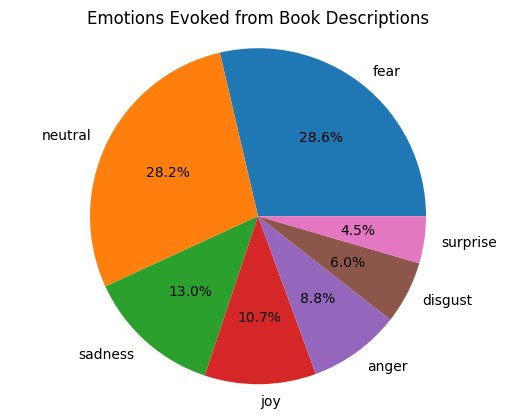

emotions_evoked
fear        12067
neutral     11889
sadness      5475
joy          4517
anger        3726
disgust      2545
surprise     1904
Name: count, dtype: int64


In [216]:
emotion_counts = df["emotions_evoked"].value_counts()

# Plot with correct label order
plt.pie(emotion_counts, labels=emotion_counts.index, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Emotions Evoked from Book Descriptions")
plt.show()

print(emotion_counts)

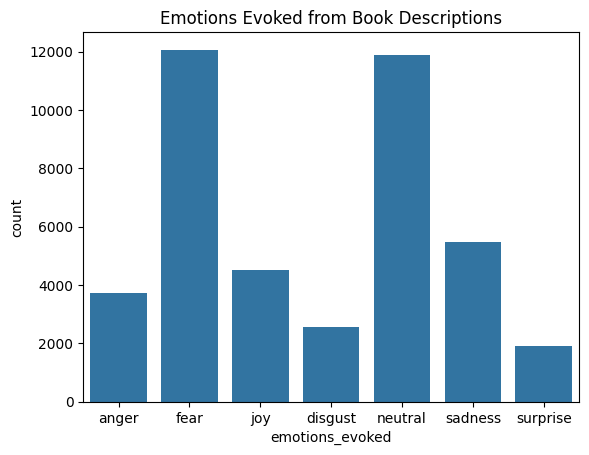

In [217]:
sns.countplot(data=df, x="emotions_evoked")
plt.title("Emotions Evoked from Book Descriptions")
plt.show()

In [218]:
print(
    f'The Shining Description: {df[df["title"] == "The Shining"].description_cleaned.values}'
)

print(
    f'\nThe Shining Prediction Emotion: {df[df["title"] == "The Shining"].emotions_evoked}'
)

The Shining Description: ['jack torrances new job overlook hotel perfect chance fresh start offseason caretaker atmospheric old hotel hell plenty time spend reconnecting family working writing harsh winter weather sets idyllic location feels ever remoteand sinister one notice strange terrible forces gathering around overlook danny torrance uniquely gifted fiveyearoldthe shiningstephen king goodreads authorthe shining shiningstephen king goodreads authorthe shining']

The Shining Prediction Emotion: 111    fear
Name: emotions_evoked, dtype: object


In [350]:
book_emotions_df = (
    df.groupby("title")["emotions_evoked"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)


book_emotions_df = book_emotions_df.reindex(columns=emotion_labels, fill_value=0)

print("Emotional Fingerprints:")
display(book_emotions_df)

Emotional Fingerprints:


emotions_evoked,anger,disgust,fear,joy,neutral,sadness,surprise
title,,,,,,,
"""A Problem from Hell"": America and the Age of Genocide",0.0,0.0,1.0,0.0,0.0,0.0,0.0
"""Dead Rock Stars""",0.0,0.0,0.0,0.0,0.0,1.0,0.0
"""Evil"" Arabs in American Popular Film: Orientalist Fear",0.0,0.0,0.0,0.0,0.0,0.0,1.0
"""Exterminate All the Brutes"": One Man's Odyssey into the Heart of Darkness and the Origins of European Genocide",0.0,0.0,1.0,0.0,0.0,0.0,0.0
"""Repent, Harlequin!"" Said the Ticktockman",1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
تاريخ الفكر الأوروبي الحديث 1601 - 1977م,0.0,0.0,0.0,0.0,1.0,0.0,0.0
رأيهم في الإسلام,0.0,0.0,0.0,0.0,1.0,0.0,0.0
سیصد و شصت و پنج روز با ادبیّات انگلیسی در قلمرو زرین,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [435]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


def recommend_books(user_emotion_vector, book_emotions_df, full_df, top_n=15):
    book_vectors = book_emotions_df[emotion_labels].values
    similarities = cosine_similarity([user_emotion_vector], book_vectors)

    similar_books_idx = np.argsort(similarities[0])[::-1]
    top_indices = similar_books_idx[: top_n * 20]

    top_titles = book_emotions_df.iloc[top_indices].index

    candidate_df = full_df[full_df["title"].isin(top_titles)]

    candidate_df = candidate_df.sort_values(
        by=["title", "numRatings"], ascending=[True, False]
    )
    candidate_df = candidate_df.drop_duplicates(subset="title", keep="first")

    candidate_df = candidate_df[
        (candidate_df["numRatings"] >= 50_000) & (candidate_df["rating"] >= 3.75)
    ]
    # print(candidate_df[["title", "rating", "numRatings"]])

    recommended_books_df = (
        candidate_df.sort_values(by=["rating", "numRatings"], ascending=[False, False])
        .head(top_n)
        .reset_index(drop=True)
    )

    return recommended_books_df

In [438]:
user_input = [
    0.0,  # anger
    0.0,  # disgust
    1.0,  # fear
    0.0,  # joy
    0.0,  # neutral
    0.0,  # sadness
    0.0,  # surprise
]

top_15_books = recommend_books(user_input, book_emotions_df, df, top_n=15)
print(len(top_15_books))

for idx, row in top_15_books.iterrows():
    print(f"\nTitle: {row['title']}")
    print(f"Author: {row['author']}")
    print(f"Rating: {row['rating']}")
    print(f"Description: {row['description']}")
    print(f"Language: {row['language']}")
    print(f"Genres: {row['genres']}")
    print(f"Pages: {row['pages']}")
    print(f"Publisher: {row['publisher']}")
    print(f"Publish Date: {row['publishDate']}")
    print(f"Number of Ratings: {row['numRatings']}")
    print(f"Liked Percent: {row['likedPercent']}")
    print(f"Cover Image URL: {row['coverImg']}")

15

Title: A Court of Mist and Fury
Author: Sarah J. Maas (Goodreads Author)
Rating: 4.62
Description: Feyre survived Amarantha's clutches to return to the Spring Court—but at a steep cost. Though she now has the powers of the High Fae, her heart remains human, and it can't forget the terrible deeds she performed to save Tamlin's people.Nor has Feyre forgotten her bargain with Rhysand, High Lord of the feared Night Court. As Feyre navigates its dark web of politics, passion, and dazzling power, a greater evil looms—and she might be key to stopping it. But only if she can harness her harrowing gifts, heal her fractured soul, and decide how she wishes to shape her future—and the future of a world cleaved in two.With more than a million copies sold of her beloved Throne of Glass series, Sarah J. Maas's masterful storytelling brings this second book in her seductive and action-packed series to new heights.A Court of Mist and FurySarah J. Maas (Goodreads Author)A Court of Thorns and Roses #

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report


# Feature and target
X = df["description_cleaned"].astype(str)
y = df["emotions_evoked"].astype(str)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.9, min_df=5)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [444]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=50,
    min_samples_split=10,
    class_weight="balanced",
    random_state=42,
)

clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.43      0.28      0.34       745
     disgust       0.40      0.11      0.18       509
        fear       0.54      0.66      0.59      2414
         joy       0.37      0.58      0.45       903
     neutral       0.56      0.48      0.52      2378
     sadness       0.39      0.44      0.41      1095
    surprise       0.57      0.22      0.31       381

    accuracy                           0.49      8425
   macro avg       0.47      0.40      0.40      8425
weighted avg       0.49      0.49      0.47      8425



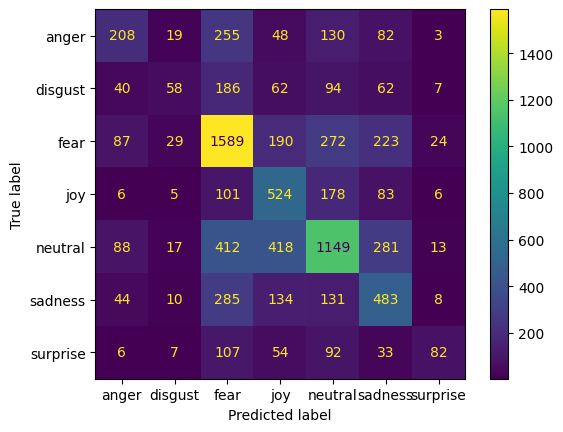

In [445]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test_vec, y_test)